# Task 7
Importing tha data

In [4]:
import pandas as pd
data = pd.read_csv("../CommonData/agaricus-lepiota.data")
dummies = pd.get_dummies(data)

Running the KMeans method for with number of clusters equal to 2 to 30, while recording the number of clusters,
the silhouette score and lastly the y predictions.

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#First index is for the i in the for loop, second is for the actual score, third is for the prediction
info = []
best = (-1,-1,-1)
for i in range(2,31):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(dummies)
    labels = kmeans.labels_
    score = silhouette_score(dummies, labels, metric="euclidean")
    y_kmeans = kmeans.predict(dummies)
    info.append((i, score, y_kmeans))
    if score > best[1]:
        best = info[i-2]
print(best)

(9, 0.30908100522521537, array([8, 4, 4, ..., 5, 2, 5], dtype=int32))


Plotting the scores for different number of clusters

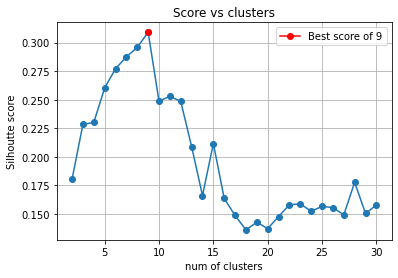

In [53]:
import matplotlib.pyplot as plt
plt.title("Score vs clusters")
plt.xlabel("num of clusters")
plt.ylabel("Silhoutte score")
plt.plot([info[i][0] for i in range(len(info))], [info[i][1] for i in range(len(info))], marker="o")
plt.plot(best[0], best[1], marker="o", color="red", label=f"Best score of {best[0]}")
plt.grid()
plt.legend()
plt.show()

Doing pca to reduce dimensionallity to be able to plot the clusters

(8124, 3)


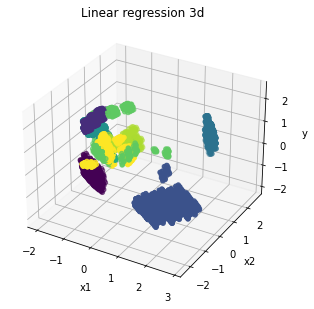

In [48]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
x_pca = pca.fit_transform(dummies, best[2])
print(x_pca.shape)


fig = plt.figure("Linear regression 3d")
ax = fig.add_subplot(projection='3d')
ax.set_title("Linear regression 3d")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
fig.set_figheight(5)
fig.set_figwidth(5)
# Scatter for the actual data
ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=best[2], s=20, cmap="viridis")
plt.show()